In [60]:
import networkx as nx
import collections
import matplotlib.pyplot as plt

## Facebook Network

This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset is available on https://snap.stanford.edu/data/ego-Facebook.html

In [61]:
def read_graph(filename):
    G = nx.Graph()
    lines = [line.rstrip('\n') for line in open(filename, 'r')] 
    edge_list=list(map(lambda edge: [int(edge.split()[0]), int(edge.split()[1])], lines))
    G.add_edges_from(edge_list)
    return G

In [62]:
fb_graph=read_graph("data/facebook_combined.txt")

In [63]:
print("Number of Nodes: ", fb_graph.number_of_nodes())
print("Number of Edges: ", fb_graph.number_of_edges())
print("Clustering Coefficient:", round(nx.average_clustering(fb_graph),4))


Number of Nodes:  4039
Number of Edges:  88234
Clustering Coefficient: 0.6055


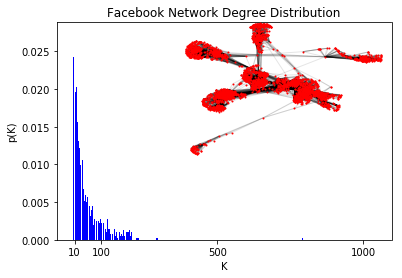

In [64]:

degree_sequence = sorted([d for n, d in fb_graph.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cnt = [i/num_nodes for i in cnt]
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Facebook Network Degree Distribution")
plt.ylabel("p(K)")
plt.xlabel("K")
ax.set_xticks([1000, 500, 100, 10])
ax.set_xticklabels([1000, 500, 100, 10])

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(fb_graph), key=len, reverse=True)[0]
pos = nx.spring_layout(fb_graph)
plt.axis('off')
nx.draw_networkx_nodes(fb_graph, pos, node_size=1)
nx.draw_networkx_edges(fb_graph, pos, alpha=0.1)

plt.show()

## WS Graph

The Watts–Strogatz model is a random graph generation model that produces graphs with small-world properties, including short average path lengths and high clustering.

In [65]:
ws_graph = nx.watts_strogatz_graph(n = 4039, k = 57, p = 0.5)

In [66]:
print("Number of Nodes: ", ws_graph.number_of_nodes())
print("Number of Edges: ", ws_graph.number_of_edges())
print("Clustering Coefficient:", round(nx.average_clustering(ws_graph),4))


Number of Nodes:  4039
Number of Edges:  113092
Clustering Coefficient: 0.1018


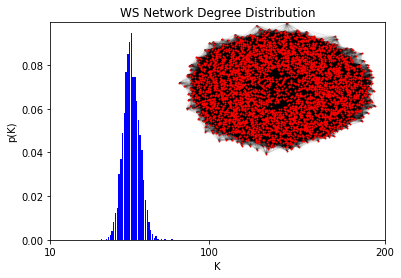

In [71]:
degree_sequence = sorted([d for n, d in ws_graph.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cnt = [i/num_nodes for i in cnt]
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("WS Network Degree Distribution")
plt.ylabel("p(K)")
plt.xlabel("K")
ax.set_xticks([200, 100, 10])
ax.set_xticklabels([200, 100, 10])

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(ws_graph), key=len, reverse=True)[0]
pos = nx.spring_layout(ws_graph)
plt.axis('off')
nx.draw_networkx_nodes(ws_graph, pos, node_size=1)
nx.draw_networkx_edges(ws_graph, pos, alpha=0.05)

plt.show()

## BA Graph

The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. Several natural and human-made systems, including the Internet, the world wide web, citation networks, and some social networks are thought to be approximately scale-free and certainly contain few nodes (called hubs) with unusually high degree as compared to the other nodes of the network. The BA model tries to explain the existence of such nodes in real networks. 

In [68]:
ba_graph = nx.barabasi_albert_graph(n = 4039, m = 6)

In [69]:
print("Number of Nodes: ", ba_graph.number_of_nodes())
print("Number of Edges: ", ba_graph.number_of_edges())
print("Clustering Coefficient:", round(nx.average_clustering(ba_graph),4))


Number of Nodes:  4039
Number of Edges:  24198
Clustering Coefficient: 0.0166


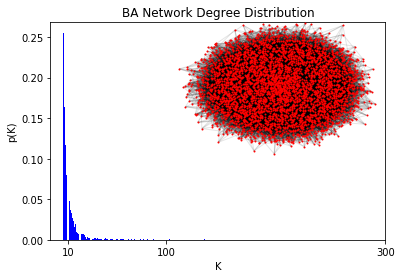

In [70]:
degree_sequence = sorted([d for n, d in ba_graph.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cnt = [i/num_nodes for i in cnt]
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("BA Network Degree Distribution")
plt.ylabel("p(K)")
plt.xlabel("K")
ax.set_xticks([300, 100, 10])
ax.set_xticklabels([300, 100, 10])

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(ba_graph), key=len, reverse=True)[0]
pos = nx.spring_layout(ba_graph)
plt.axis('off')
nx.draw_networkx_nodes(ba_graph, pos, node_size=1)
nx.draw_networkx_edges(ba_graph, pos, alpha=0.1)

plt.show()